# Linear Autoencoder for Dimensionality Reduction

** The goal of this section is to reduce a 55 dimensional data set into a 2-dimensional dataset by using autoencodders!  Then we use the the label "Tin" to color PCs to see if we could have any separation in the reduced data**

## The Data

** Import numpy, matplotlib, and pandas**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

** Use pandas to read in the csv file . It contains 26000 rows and 55 columns of anonymized data along with 1 last column with a classification label.**

In [3]:
#features used
index = ['u (m/s)', 'T (K)', 'H2', 'H', 'O', 'O2', 'OH',
       'H2O', 'HO2', 'H2O2', 'C', 'CH', 'CH2', 'CH2(S)', 'CH3', 'CH4', 'CO',
       'CO2', 'HCO', 'CH2O', 'CH2OH', 'CH3O', 'CH3OH', 'C2H', 'C2H2', 'C2H3',
       'C2H4', 'C2H5', 'C2H6', 'HCCO', 'CH2CO', 'HCCOH', 'N', 'NH', 'NH2',
       'NH3', 'NNH', 'NO', 'NO2', 'N2O', 'HNO', 'CN', 'HCN', 'H2CN', 'HCNN',
       'HCNO', 'HOCN', 'HNCO', 'NCO', 'N2', 'AR', 'C3H7', 'C3H8', 'CH2CHO',
       'CH3CHO']
# target
target_name = ['Tin']

In [4]:
labels = pd.read_csv("labels.csv", sep='\t') # shape: (32273, 62)
labels_name = labels.columns.values.tolist() # return list of features names
labels.head()

,z (m),u (m/s),V (1/s),T (K),H2,H,O,O2,OH,H2O,...,AR,C3H7,C3H8,CH2CHO,CH3CHO,Z,c,HR,sm,Tin
0,0.000408,3.618850,2.531894e+01,900.000000,8.982076e-11,1.767299e-16,0.000000e+00,0.000000,0.000000e+00,4.105146e-16,...,1.704387e-18,0.000000e+00,3.610414e-18,1.408205e-29,0.000000e+00,1.000000,-1.000000,1.383743e-03,125.0,900.0
1,0.011614,0.242234,0.000000e+00,500.209712,4.239998e-03,2.773318e-15,4.230132e-17,0.179017,2.368248e-14,4.481909e-05,...,0.000000e+00,6.844475e-15,6.591774e-12,1.856083e-20,2.626325e-11,0.085258,0.000142,-7.942999e-02,0.0,500.0
2,0.017166,3.789837,3.326699e-129,2267.870786,9.545099e-02,3.115552e-03,1.830125e-05,0.000013,8.173013e-04,1.627574e-01,...,1.113075e-102,1.336602e-18,6.773060e-19,1.785170e-12,6.338258e-13,0.085258,0.997102,-1.022505e+06,0.0,900.0
3,0.018035,1.386094,0.000000e+00,1817.412812,8.919724e-05,1.263945e-05,1.308721e-04,0.078818,1.170264e-03,1.179354e-01,...,0.000000e+00,0.000000e+00,0.000000e+00,5.466133e-27,0.000000e+00,0.033771,0.996441,-1.299898e+06,0.0,500.0
4,0.013240,0.089593,0.000000e+00,554.125759,8.067399e-04,3.398120e-11,1.818058e-11,0.180601,3.219009e-09,2.733310e-02,...,5.923583e-100,9.898650e-12,1.623327e-07,1.007418e-12,5.323347e-07,0.028302,0.215183,-6.974898e+03,0.0,300.0


In [5]:
new_labels = pd.read_csv("new_labels.csv") #shape: (32273, 55)
new_labels = new_labels[index]

In [6]:
Y_cf = pd.read_csv("Y_cf.csv", sep=',', names = labels_name) #shape: (6273, 62)
Y_cf.shape

(6273, 62)

In [7]:
Y_pf = pd.read_csv("Y_pf.csv", sep=',', names = index) #shape: (26000, 55)

In [8]:
X_pf = pd.read_csv("X.csv", sep=',', names = ['unknown_1', 'unknown_2', 'Tin']) #shape: (25999, 3) 
X_pf.head()

,unknown_1,unknown_2,Tin
0,0.011614,0.085258,500
1,0.017166,0.085258,900
2,0.018035,0.033771,500
3,0.013240,0.028302,300
4,0.014744,0.060219,900


In [9]:
#target = labels['Tin']
targets_name = list(set(labels_name) - set(index)) # target to label and classify features
#target = target.iloc[0:26000]
#df_array = df.values

In [10]:
# Features
#df = new_labels  #shape: (32273, 55)
df = Y_pf         #shape: (26000, 55)

# target
#target = labels['Tin']  #shape:
target = X_pf['Tin']     #shape:

## Scale the Data

** Using scikit learn to scale the data with a StandardScaler. This scaled data is saved as a new variable called scaled_data. **

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sd_scaler = StandardScaler()
X_sd_scaled_with_centring = sd_scaler.fit_transform(df)

In [13]:
class My_StandardScaler():
    
    """
    Standardize features by removing 
    the mean and scaling to unit variance
    """

           
    
    def __init__(self):
        return None
    
    def transform(self, X):
        """Centring and Scaling the features of X"""
        X = np.asarray(X)
        X = np.float64(X)
        sd = np.std(X, axis=0)  
        m = np.median(sd[sd > 0])   # replace the zero values  
        sd[sd == 0] = m             # by the median
        Z = X/sd
        return Z
        
    
    def fit_transform(self, X):
        """Centring and Scaling the features of X"""
        X = np.asarray(X)
        X = np.float64(X)
        sd = np.std(X, axis=0)
        m = np.median(sd[sd > 0])   # replace the zero                                        
        sd[sd == 0] = m             # values by the median 
        X_mean = X.mean(axis=0)
        X_center = X-X_mean        
        Z = X_center/sd
        return Z


In [14]:
my_sd_scaler = My_StandardScaler()
X_sd_scaled_without_centring = sd_scaler.transform(df)

In [15]:
scaled_data = X_sd_scaled_with_centring

# The Linear Autoencoder

** Import tensorflow and import fully_connected layers from tensorflow.contrib.layers. **

In [18]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

** Filling out the number of inputs to fit the dimensions of the data set and setting the hidden number of units to be 3. Also setting the number of outputs to match the number of inputs. Also we choose a learning_rate value.**

In [19]:
num_inputs = 55  # 3 dimensional input
num_hidden = 3  # 2 dimensional representation 
num_outputs = num_inputs # Must be true for an autoencoder!

learning_rate = 0.01

### Placeholder

** Creatinh a placeholder fot the data called X.**

In [20]:
X = tf.placeholder(tf.float32, shape=[None, num_inputs])

### Layers

** Creating the hidden layer and the output layers using the fully_connected function. Remember that to perform PCA there is no activation function.**

In [21]:
hidden = fully_connected(X, num_hidden, activation_fn=None)
outputs = fully_connected(hidden, num_outputs, activation_fn=None)

### Loss Function

** Create a Mean Squared Error loss function. **

In [22]:
loss = tf.reduce_mean(tf.square(outputs - X))  # MSE

### Optimizer

** Create an AdamOptimizer designed to minimize the previous loss function. **

In [23]:
optimizer = tf.train.AdamOptimizer(learning_rate)
train  = optimizer.minimize( loss)

### Init

** Create an instance of a global variable intializer. **

In [24]:
init = tf.global_variables_initializer()

## Running the Session

** Now we create a Tensorflow session that runs the optimizer for at least 1000 steps. (We can also use epochs if we prefer, where 1 epoch is defined by one single run through the entire dataset. **

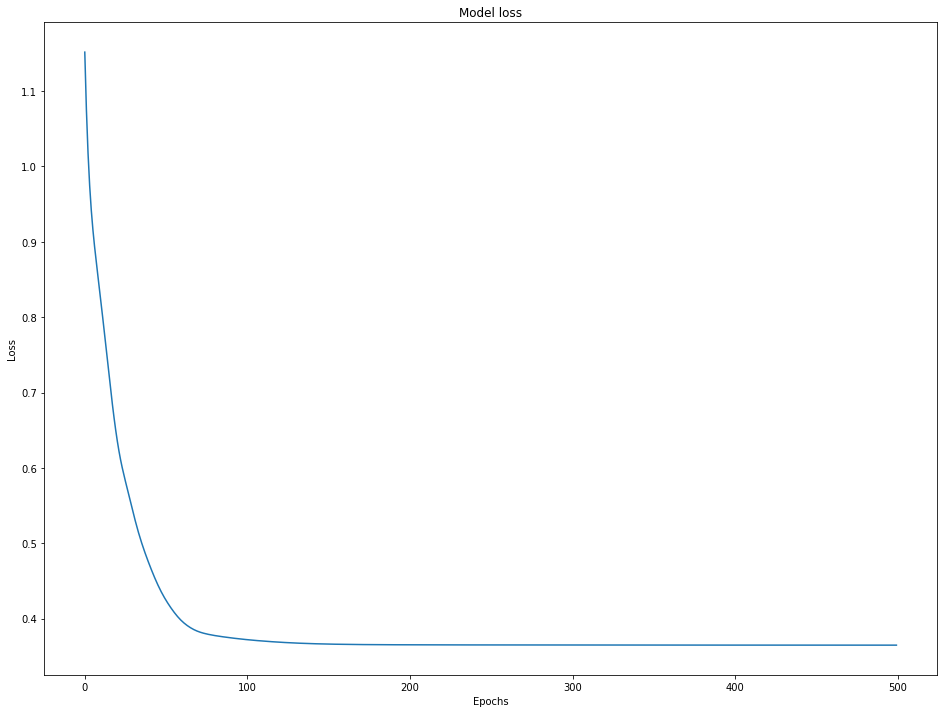

In [27]:
num_steps = 500
training_loss_array = []

with tf.Session() as sess:
    sess.run(init)
    
    for iteration in range(num_steps):
        sess.run(train,feed_dict={X: scaled_data})
        training_loss = loss.eval(feed_dict={X: scaled_data}) 
        training_loss_array.append(training_loss)
        
    plt.figure(figsize=(16,12))
    plt.plot(list(range(num_steps)), training_loss_array)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Model loss')
        

** Now, we create a session that runs the scaled data through the hidden layer.**

In [ ]:
with tf.Session() as sess:
    sess.run(init)
        
    # Now ask for the hidden layer output (the 2 dimensional output)
    output_2d = hidden.eval(feed_dict={X: scaled_data})

** Confirm that our output is now 3 dimensional along the previous axis of 55 features. **

In [ ]:
output_2d.shape

##### PC1 vs PC2 

** Now, we plot out the reduced dimensional representation of the data. Do you still have clear separation of classes even with the reduction in dimensions? Hint: You definitely should, the classes should still be clearly seperable, even when reduced to 2 dimensions. **

In [ ]:
plt.scatter(output_2d[:,0],output_2d[:,1],c=target)

In [ ]:
import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets
from scipy import special

py.offline.init_notebook_mode(connected=True)

In [ ]:
trace = go.Scatter3d(
    x= output_2d[:,0],
    y= output_2d[:,1], 
    z= output_2d[:,2],


    mode='markers',
    marker=dict(
        size=2,
        color=target,
        colorbar=dict(
        title='Tin'
            ),
        colorscale='Viridis'
        
        ))


data = [trace]


layout = go.Layout(

    title='<b>PC1 vs PC2 vs PC3: StandardScaler with centring</b>',
    scene = dict(
    xaxis = dict(
        title='PC1'),
    yaxis = dict(
        title='PC2'),
    zaxis = dict(
        title='PC3'),
    
    ),
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)


# https://stats.stackexchange.com/questions/190148/building-an-autoencoder-in-tensorflow-to-surpass-pca